<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/Lab3_CameraCalibration.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

# ❄️ Lab3: Camera Calibration 

**A note on this document**
This document is known as a Jupyter notebook; it is used in academia and industry to allow text and executable code to coexist in a very easy to read format. Blocks can contain text or executable code. To run the executable code in this notebook, click <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/Lab3_CameraCalibration.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>
. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

## Objectives

The purpose of this lab is to calibrate the OpenMV camera that will be used in your Project 2.

```{image} ./figures/AprilTagBlocks.jpg
:width: 500
:align: center
```

## Background

### AprilTags

AprilTag is a visual fiducial system, useful for a wide variety of tasks including augmented reality, robotics, and camera calibration. We will learn how fiducial markers are used in image processing. Specifically, we will utilize MicroPython to identify different AprilTags and use the 3D position and orientation to determine the distance of an object from the camera.

```{image} ./figures/AprilTags.png
:width: 500
:align: center
```

A fiducial marker is an artificial feature used in creating controllable experiments, ground truthing, and in simplifying the development of systems where perception is not the central objective. A few examples of fiducial markers include ArUco Markers, AprilTags, and QR codes. Each of these different tags hold information such as an ID or, in the case of QR codes, websites, messages, and etc. We will primarily be focusing on AprilTags as there is a very robust Python package already built. This library identifies AprilTags and will provide information about the tags size, distance, and orientation.

ref: https://april.eecs.umich.edu/software/apriltag



## 💻 Procedure

1. **Read this page thoroughly.**
2. Then, go to Colab by clicking the icon at the end of this page and complete the sensor calibration. **AR means action required in Colab.**

### OpenMV Cam

Go to https://openmv.io/pages/download to download the latest OpenMV IDE.  Install the software on your computer.

- Connect the camera to your computer and run the software. 
- Download `find_apriltags_3d_pose_4.py` from Teams.
- In OpenMV IDE, go to File > Open File and select `find_apriltags_3d_pose_4.py` to load.
- Click the Connect button on the bottom left of the IDE.  
- Click the Start button (green arrow).
- Click the `Serial Terminal` tab at the bottom of the window.
- Bring in blocks under the camera to detect them.


```{image} ./figures/DetectingBlock.png
:width: 350
:align: center
```

On Serial Terminal, you will find numbers similar to

`2,3,4.041906,-1.517668,-9.712036,181.984062,358.371687,224.128056,4,5.561428,1.540591,-9.330090,160.538206,354.057860,201.279116`

The descriptions of the data fields are as follows.
- Field 1: Number of AprilTags detected.
- Field 2: AprilTag ID
- Field 3: x value
- Field 4: y value
- Field 5: z value
- Field 6: Rx value
- Field 7: Ry value
- Field 8: Rz value
- Field 9: AprilTag ID (if there are more than 1 AprilTag)
- Field 10: x value
- Field 11: y value
- Field 12: z value
- Field 13: Rx value
- Field 14: Ry value
- Field 15: Rz value
-    :
-    :

The values are based on large-sized AprilTags. So, the distances returned by the program must be scaled. For example, $z = -9.712$ m is incorrect, and it shoud probably be 11 cm. So, we need to find the scale factor and offset.  

We need to solve a least squares regression problem to find a linear equation that best fits the measured data. 

The goal is to find $m$ and $b$ such that $ d = mz + b $ best approximates the linear relationship between $d$ and $z$, where $d$ is the actual distance between the camera lenz and the block and $z$ is the OpenMV output.

Place the camera at the orign and a block with an AprilTag at $(x,y)$ = (10, 0) cm. Place the block on top of another block for 1 inch above the ground. 


```{image} ./figures/OpenMV_Calibration.png
:width: 350
:align: center
```

As you move the block 1 cm in the camera's $z$ direction at a time, record the $z$ values returned by the apriltag detection in OpenMV IDE.  The $x$ direction on the grid is the $-z$ direction of the camera.

**AR: Take measurements and put them in the array below**

-0.0195674513003242 -0.00029218538219802267


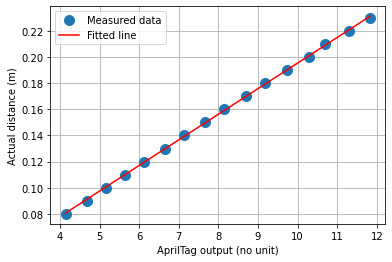

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Distances from 8 cm to 23 cm
# Change the range if needed
d = np.arange(0.08, 0.24, 0.01)  
# Add your measurements here
# Do not add negative signs, e.g.,
z = -np.array([4.14, 4.67, 5.16, 5.63, 6.13, 6.64, 7.12, 7.65, 8.13, 8.69, 9.18, 9.73, 10.28, 10.70, 11.30, 11.83])

C = np.vstack([z, np.ones(len(z))]).T
m, b = np.linalg.lstsq(C, d, rcond=None)[0]
print(m, b)
plt.plot(-z, d, 'o', label='Measured data', markersize=10)
plt.plot(-z, m*z + b, 'r', label='Fitted line')
plt.xlabel('AprilTag output (no unit)')
plt.ylabel('Actual distance (m)')
plt.legend()
plt.grid('on')
plt.show()

Repeat the same for the $x$ direction (horizontal direction) of the camera - It is the $y$ direction of the grid. You can ignore the offset this time, because the pixel at the center of the image is always $(x, y)$ = (0,0).  The offset you observe while taking measurements are due to the misalignment of the camera's $x-y$ plane and the grid's $x-y$ plane.  

You don't have to repeat it for camera's $y$ direction (vertical direction). We can use the same fitting values for the $x$ direction. They should be them same theoretically.

**AR: Take measurements and put them in the array below**

0.01165609905756856 0.001229188627889056


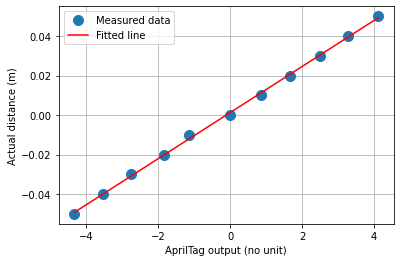

In [11]:
# At 0.20 m away
d = np.arange(-0.05, 0.06, 0.01) 
x = np.array([-4.34, -3.52, -2.75, -1.85, -1.13, 0.0, 0.85, 1.68, 2.50, 3.28, 4.12])
C = np.vstack([x, np.ones(len(x))]).T
m, b = np.linalg.lstsq(C, d, rcond=None)[0]
print(m, c)
plt.plot(x, d, 'o', label='Measured data', markersize=10)
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.xlabel('AprilTag output (no unit)')
plt.ylabel('Actual distance (m)')
plt.legend()
plt.grid('on')
plt.show()

### Update OpenMV MicroPython

Since we are not going to use the orientation of AprilTags, we don't have to send it to the PC.  Update the mz, bz, mx, my values in your MicroPython code.

```Python
tag_output = list()
num_tags = 0

# mz is the slope for the z direction
# bz is the offset for the z direction
# mx is the slope for the x direction
# my is the slope for the y direction, and it should be the same as mx
mz = 1
bz = 0
mx = 1
my = 1  


while(True):
    clock.tick()
    :
    :
```

Save the code to OpenMV cam as shown below


```{image} ./figures/OpenMV_SaveToCam.png
:width: 350
:align: center
```

